In [68]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
seed = 42

In [69]:
data = pd.read_csv("datass/dataset.csv")

In [70]:
# Rimuovi le righe in base alle condizioni specificate
data = data[(data['Education_Level'] != 'Unknown') & (data['Income_Category'] != 'Unknown') & (data['Marital_Status'] != 'Unknown')]

In [71]:
data['Attrition_Flag'] = data.Attrition_Flag.map({'Attrited Customer': 0,
                                               'Existing Customer': 1})
data['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
1    0.842819
0    0.157181
Name: proportion, dtype: float64

In [72]:
variables_to_keep = [
    'Dependent_count',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Total_Trans_Ct',
    'Avg_Utilization_Ratio',
    'Gender',
    'Income_Category'
]
data_subset = data.loc[:, variables_to_keep]

In [73]:
x = data_subset
y = pd.DataFrame(data['Attrition_Flag'])

In [74]:
categorical_columns = ['Gender', 'Income_Category']

x_encoded = pd.get_dummies(x, columns=categorical_columns)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=seed, shuffle=True)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=seed, shuffle=True)

In [76]:
clf = SVC(kernel='rbf')
scaler = StandardScaler()

scaler.fit_transform(x_train)
clf.fit(scaler.fit_transform(x_train), y_train)
r2 = clf.score(scaler.transform(x_val), y_val)
y_hat = clf.predict(scaler.transform(x_val))
accuracy = accuracy_score(y_val, y_hat) 
confusion = confusion_matrix(y_val, y_hat)  # Calcola la matrice di confusione

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)

C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.90
Confusion Matrix:
[[ 66  72]
 [ 13 699]]


In [78]:
res = []

for C in np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True):
    for gamma in np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True):
        clf = SVC(kernel='rbf', gamma=gamma, C=C)
        scaler = StandardScaler()

        scaler.fit_transform(x_train)
        clf.fit(scaler.fit_transform(x_train), y_train)
        y_hat = clf.predict(scaler.transform(x_val))

        accuracy = accuracy_score(y_val, y_hat)
        precision = precision_score(y_val, y_hat)
        recall = recall_score(y_val, y_hat)
        f1 = f1_score(y_val, y_hat)

        print(f'{C=}, {gamma=}, {accuracy=}, {precision=}, {recall=}, {f1=}')
        res.append({
            'C': C,
            'gamma': gamma,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        })

C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=0.001, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=0.004641588833612777, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=0.021544346900318832, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=0.1, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=0.46415888336127775, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=2.154434690031882, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=10.0, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=46.41588833612773, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=215.44346900318823, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.001, gamma=1000.0, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=0.001, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=0.004641588833612777, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=0.021544346900318832, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=0.1, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=0.46415888336127775, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=2.154434690031882, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=10.0, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=46.41588833612773, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=215.44346900318823, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.004641588833612777, gamma=1000.0, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=0.001, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=0.004641588833612777, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=0.021544346900318832, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=0.1, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=0.46415888336127775, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=2.154434690031882, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=10.0, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=46.41588833612773, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=215.44346900318823, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.021544346900318832, gamma=1000.0, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1, gamma=0.001, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1, gamma=0.004641588833612777, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1, gamma=0.021544346900318832, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1, gamma=0.1, accuracy=0.8647058823529412, precision=0.8644688644688645, recall=0.9943820224719101, f1=0.9248856956237754


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1, gamma=0.46415888336127775, accuracy=0.8505882352941176, precision=0.8502994011976048, recall=0.9971910112359551, f1=0.9179056237879769


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1, gamma=2.154434690031882, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1, gamma=10.0, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1, gamma=46.41588833612773, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1, gamma=215.44346900318823, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.1, gamma=1000.0, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.46415888336127775, gamma=0.001, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.46415888336127775, gamma=0.004641588833612777, accuracy=0.8458823529411764, precision=0.8446026097271648, recall=1.0, f1=0.9157556270096463


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.46415888336127775, gamma=0.021544346900318832, accuracy=0.8894117647058823, precision=0.8931297709923665, recall=0.9859550561797753, f1=0.937249666221629


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.46415888336127775, gamma=0.1, accuracy=0.8964705882352941, precision=0.9010282776349614, recall=0.9845505617977528, f1=0.9409395973154363


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.46415888336127775, gamma=0.46415888336127775, accuracy=0.8823529411764706, precision=0.8873417721518987, recall=0.9845505617977528, f1=0.933422103861518


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.46415888336127775, gamma=2.154434690031882, accuracy=0.8458823529411764, precision=0.845422116527943, recall=0.9985955056179775, f1=0.9156471345782357


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.46415888336127775, gamma=10.0, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.46415888336127775, gamma=46.41588833612773, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.46415888336127775, gamma=215.44346900318823, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=0.46415888336127775, gamma=1000.0, accuracy=0.8376470588235294, precision=0.8376470588235294, recall=1.0, f1=0.911651728553137


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=0.001, accuracy=0.8458823529411764, precision=0.8446026097271648, recall=1.0, f1=0.9157556270096463


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=0.004641588833612777, accuracy=0.8952941176470588, precision=0.8968152866242038, recall=0.9887640449438202, f1=0.9405477621910487


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=0.021544346900318832, accuracy=0.8988235294117647, precision=0.9043927648578811, recall=0.9831460674157303, f1=0.9421265141318976


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=0.1, accuracy=0.9011764705882352, precision=0.9131578947368421, recall=0.9747191011235955, f1=0.9429347826086956


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=0.46415888336127775, accuracy=0.8905882352941177, precision=0.9056356487549148, recall=0.9705056179775281, f1=0.9369491525423728


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=2.154434690031882, accuracy=0.8611764705882353, precision=0.8703241895261845, recall=0.9803370786516854, f1=0.9220607661822986


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=10.0, accuracy=0.8494117647058823, precision=0.8501199040767387, recall=0.9957865168539326, f1=0.9172056921086675


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=46.41588833612773, accuracy=0.8458823529411764, precision=0.8462455303933254, recall=0.9971910112359551, f1=0.9155383623468729


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=215.44346900318823, accuracy=0.84, precision=0.8404255319148937, recall=0.9985955056179775, f1=0.9127086007702182


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=2.154434690031882, gamma=1000.0, accuracy=0.8388235294117647, precision=0.8386336866902238, recall=1.0, f1=0.9122357463164638


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=0.001, accuracy=0.8929411764705882, precision=0.8935361216730038, recall=0.9901685393258427, f1=0.9393737508327782


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=0.004641588833612777, accuracy=0.8976470588235295, precision=0.9021879021879022, recall=0.9845505617977528, f1=0.941571524513096


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=0.021544346900318832, accuracy=0.9070588235294118, precision=0.9159001314060446, recall=0.9789325842696629, f1=0.9463679565512559


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=0.1, accuracy=0.8964705882352941, precision=0.9182305630026809, recall=0.9620786516853933, f1=0.9396433470507544


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=0.46415888336127775, accuracy=0.8776470588235294, precision=0.9141689373297003, recall=0.9424157303370787, f1=0.9280774550484094


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=2.154434690031882, accuracy=0.86, precision=0.8710888610763454, recall=0.9775280898876404, f1=0.9212442091330245


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=10.0, accuracy=0.8470588235294118, precision=0.8497596153846154, recall=0.9929775280898876, f1=0.9158031088082901


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=46.41588833612773, accuracy=0.8458823529411764, precision=0.8462455303933254, recall=0.9971910112359551, f1=0.9155383623468729


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=215.44346900318823, accuracy=0.84, precision=0.8404255319148937, recall=0.9985955056179775, f1=0.9127086007702182


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=10.0, gamma=1000.0, accuracy=0.8388235294117647, precision=0.8386336866902238, recall=1.0, f1=0.9122357463164638


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=0.001, accuracy=0.8964705882352941, precision=0.9010282776349614, recall=0.9845505617977528, f1=0.9409395973154363


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=0.004641588833612777, accuracy=0.9, precision=0.9066147859922179, recall=0.9817415730337079, f1=0.942683749157114


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=0.021544346900318832, accuracy=0.9070588235294118, precision=0.9214380825565912, recall=0.9719101123595506, f1=0.9460013670539986


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=0.1, accuracy=0.888235294117647, precision=0.9185888738127544, recall=0.9508426966292135, f1=0.9344375431331954


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=0.46415888336127775, accuracy=0.8552941176470589, precision=0.9073305670816044, recall=0.9213483146067416, f1=0.9142857142857144


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=2.154434690031882, accuracy=0.8588235294117647, precision=0.8709273182957393, recall=0.976123595505618, f1=0.9205298013245032


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=10.0, accuracy=0.8470588235294118, precision=0.8497596153846154, recall=0.9929775280898876, f1=0.9158031088082901


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=46.41588833612773, accuracy=0.8458823529411764, precision=0.8462455303933254, recall=0.9971910112359551, f1=0.9155383623468729


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=215.44346900318823, accuracy=0.84, precision=0.8404255319148937, recall=0.9985955056179775, f1=0.9127086007702182


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=46.41588833612773, gamma=1000.0, accuracy=0.8388235294117647, precision=0.8386336866902238, recall=1.0, f1=0.9122357463164638


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=0.001, accuracy=0.8964705882352941, precision=0.9020618556701031, recall=0.9831460674157303, f1=0.9408602150537635


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=0.004641588833612777, accuracy=0.9058823529411765, precision=0.91688654353562, recall=0.976123595505618, f1=0.9455782312925171


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=0.021544346900318832, accuracy=0.9047058823529411, precision=0.9212283044058746, recall=0.9691011235955056, f1=0.944558521560575


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=0.1, accuracy=0.88, precision=0.9178082191780822, recall=0.9410112359550562, f1=0.9292649098474343


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=0.46415888336127775, accuracy=0.8470588235294118, precision=0.9030470914127424, recall=0.9157303370786517, f1=0.909344490934449


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=2.154434690031882, accuracy=0.8588235294117647, precision=0.8709273182957393, recall=0.976123595505618, f1=0.9205298013245032


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=10.0, accuracy=0.8458823529411764, precision=0.8495788206979543, recall=0.9915730337078652, f1=0.915100453661698


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=46.41588833612773, accuracy=0.8458823529411764, precision=0.8462455303933254, recall=0.9971910112359551, f1=0.9155383623468729


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=215.44346900318823, accuracy=0.84, precision=0.8404255319148937, recall=0.9985955056179775, f1=0.9127086007702182


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=215.44346900318823, gamma=1000.0, accuracy=0.8388235294117647, precision=0.8386336866902238, recall=1.0, f1=0.9122357463164638


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=0.001, accuracy=0.9011764705882352, precision=0.9067357512953368, recall=0.9831460674157303, f1=0.9433962264150944


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=0.004641588833612777, accuracy=0.9070588235294118, precision=0.919205298013245, recall=0.9747191011235955, f1=0.9461486025903203


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=0.021544346900318832, accuracy=0.8964705882352941, precision=0.9182305630026809, recall=0.9620786516853933, f1=0.9396433470507544


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=0.1, accuracy=0.86, precision=0.9112343966712899, recall=0.922752808988764, f1=0.9169574319609212


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=0.46415888336127775, accuracy=0.8458823529411764, precision=0.905160390516039, recall=0.9115168539325843, f1=0.9083275017494751


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=2.154434690031882, accuracy=0.8541176470588235, precision=0.8702770780856424, recall=0.9705056179775281, f1=0.9176626826029216


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=10.0, accuracy=0.8458823529411764, precision=0.8495788206979543, recall=0.9915730337078652, f1=0.915100453661698


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=46.41588833612773, accuracy=0.8458823529411764, precision=0.8462455303933254, recall=0.9971910112359551, f1=0.9155383623468729


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=215.44346900318823, accuracy=0.84, precision=0.8404255319148937, recall=0.9985955056179775, f1=0.9127086007702182


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C=1000.0, gamma=1000.0, accuracy=0.8388235294117647, precision=0.8386336866902238, recall=1.0, f1=0.9122357463164638


In [79]:
heatmap_data = pd.DataFrame(res).pivot(index='C', columns='gamma', values='Accuracy')
heatmap_data

gamma,0.001000,0.004642,0.021544,0.100000,0.464159,2.154435,10.000000,46.415888,215.443469,1000.000000
C,,,,,,,,,,
0.001000,0.837647,0.837647,0.837647,0.837647,0.837647,0.837647,0.837647,0.837647,0.837647,0.837647
0.004642,0.837647,0.837647,0.837647,0.837647,0.837647,0.837647,0.837647,0.837647,0.837647,0.837647
0.021544,0.837647,0.837647,0.837647,0.837647,0.837647,0.837647,0.837647,0.837647,0.837647,0.837647
0.100000,0.837647,0.837647,0.837647,0.864706,0.850588,0.837647,0.837647,0.837647,0.837647,0.837647
0.464159,0.837647,0.845882,0.889412,0.896471,0.882353,0.845882,0.837647,0.837647,0.837647,0.837647
2.154435,0.845882,0.895294,0.898824,0.901176,0.890588,0.861176,0.849412,0.845882,0.840000,0.838824
10.000000,0.892941,0.897647,0.907059,0.896471,0.877647,0.860000,0.847059,0.845882,0.840000,0.838824
46.415888,0.896471,0.900000,0.907059,0.888235,0.855294,0.858824,0.847059,0.845882,0.840000,0.838824
215.443469,0.896471,0.905882,0.904706,0.880000,0.847059,0.858824,0.845882,0.845882,0.840000,0.838824


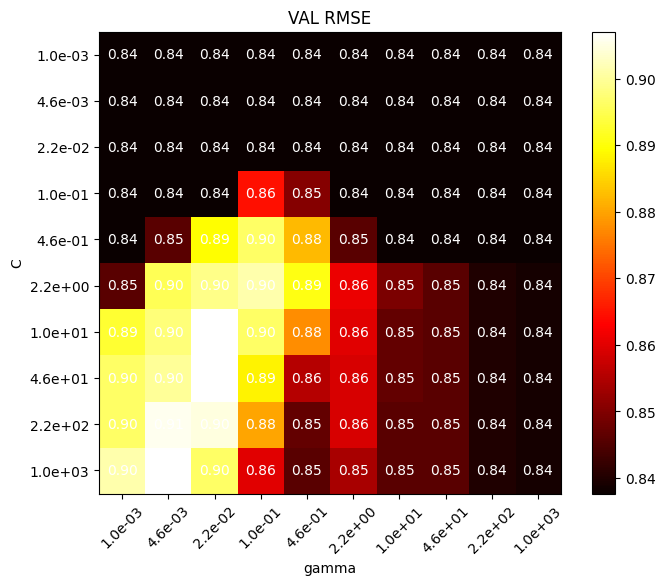

In [80]:
p_range = np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True)
p_range_str = [f'{p:.1e}' for p in p_range]

fig, ax = plt.subplots(figsize=(8,6))

heatmap = ax.imshow(
    heatmap_data,
    interpolation="nearest",
    cmap=plt.cm.hot,
)

data_v = heatmap_data.values
for i in range(data_v.shape[0]):
    for j in range(data_v.shape[1]):
        c = 'black' if data_v[i, j] >= 1 else 'white'
        ax.text(j, i, f'{data_v[i, j]:.2f}', ha='center', va='center', color=c, fontsize=10)


ax.set_xlabel("gamma")
ax.set_ylabel("C")
plt.colorbar(heatmap, ax=ax)
ax.set_xticks(np.arange(len(p_range)), p_range_str, rotation=45)
ax.set_yticks(np.arange(len(p_range)), p_range_str)
plt.title("VAL RMSE")
plt.show()

In [81]:
df = pd.DataFrame(res)
df.iloc[df.Accuracy.argmax()]

C            10.000000
gamma         0.021544
Accuracy      0.907059
Precision     0.915900
Recall        0.978933
F1-score      0.946368
Name: 62, dtype: float64

In [82]:
C = 10
gamma = 0.021544

In [83]:
print(f'SVC, {C=}, {gamma=}')
clf = SVC(C=C, gamma=gamma, kernel='rbf')
scaler = StandardScaler()

clf.fit(scaler.fit_transform(x_train), y_train)

y_hat_val = clf.predict(scaler.transform(x_val))
accuracy = accuracy_score(y_val, y_hat_val)
precision = precision_score(y_val, y_hat_val)
print(f'VAL: {accuracy=}, {precision=}')

y_hat_test = clf.predict(scaler.transform(x_test))
accuracy = accuracy_score(y_test, y_hat_test)
precision = precision_score(y_test, y_hat_test)
print(f'VAL: {accuracy=}, {precision=}')

SVC, C=10, gamma=0.021544


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VAL: accuracy=0.9070588235294118, precision=0.9159001314060446
VAL: accuracy=0.9019054340155258, precision=0.9151090342679128


In [84]:
confusion_val = confusion_matrix(y_val, y_hat_val)
confusion_test = confusion_matrix(y_test, y_hat_test)

In [85]:
print(confusion_val)

[[ 74  64]
 [ 15 697]]


In [86]:
print(confusion_test)

[[ 103  109]
 [  30 1175]]
